# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
df['Income'] =df['Income'].fillna(df['Income'].mean())

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [8]:
df = df.drop(columns=['ID', 'Dt_Customer'])

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [9]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [11]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')
                                                     
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [13]:
print(df['Marital_Status'].unique())

['Single' 'relationship']


In [14]:
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [15]:
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [16]:
df['Total_Expenses'].head(5)

0    1617
1      27
2     776
3      53
4     422
Name: Total_Expenses, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [17]:
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

In [18]:
df['Num_Total_Purchases'].head(5)

0    25
1     6
2    21
3     8
4    19
Name: Num_Total_Purchases, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [20]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [21]:
df['Kids'].head(5)

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [52]:
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

In [54]:
print(df['TotalAcceptedCmp'].head(5))

0    1
1    0
2    0
3    0
4    0
Name: TotalAcceptedCmp, dtype: int64


### 11. Drop those columns which we have used above for obtaining new features

In [23]:
col_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Kidhome','Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]
df = df.drop(columns=col_del, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [24]:
import datetime

current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df = df.drop(columns=['Year_Birth'])
print(df['Age'].head(5))

0    67
1    70
2    59
3    40
4    43
Name: Age, dtype: int64


### 13. Encode the categorical variables in the dataset

In [25]:
cate = ['Education', 'Marital_Status']
lbl_encode = LabelEncoder()

for i in cate:
    df[i] = df[[i]].apply(lbl_encode.fit_transform)

In [28]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,Age
0,2,0,58138.0,58,7,0,1617,25,0,67
1,2,0,46344.0,38,5,0,27,6,2,70
2,2,1,71613.0,26,4,0,776,21,0,59
3,2,1,26646.0,26,6,0,53,8,1,40
4,4,1,58293.0,94,5,0,422,19,1,43


### 14. Standardize the columns, so that values are in a particular range

In [31]:
df1 = df.copy()
s = StandardScaler()

df_standardized = s.fit_transform(df1)

df_standardized = pd.DataFrame(df_standardized, columns = df1.columns)
df_standardized.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [32]:
#Step1: calculate the covariance matrix

cov_matrix = np.cov(df_standardized.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972,  0.00344176,
        -0.00520466, -0.01775232,  0.00671037,  0.03917598, -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.55006966,
        -0.02723528,  0.66500337,  0.5636214 , -0.29084155,  0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145,  0.01987996],
       [-0.04029882,  0.00344176, -0.55006966, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12119336],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014,  0.030141  ],
       [ 0.09209518, -0.01775232,  0.66500337,  0.02044173, -0.50044131,
        -0.03707503,  1.00044663,  0.75423984

In [33]:
#Step2: calculate the eigen values and eigen vectors

eig_vals, eig_vactors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n', eig_vals)
print('\n')
print('eigein vectors','\n', eig_vactors)

eigein vals: 
 [3.00605354 0.1791556  0.34039073 1.24470761 0.60536386 0.82001422
 0.78004549 1.03376198 1.00620361 0.98876964]


eigein vectors 
 [[-0.08400425  0.02178328  0.03462383  0.59058432  0.05008878  0.74263889
  -0.01584605 -0.26332081 -0.13115025  0.04085804]
 [ 0.0099841  -0.01042211 -0.00647786  0.03590739  0.07332849  0.11590229
  -0.07866684 -0.05205555  0.98046171  0.09719342]
 [-0.47476645  0.15894187 -0.73033052  0.07884051 -0.44904852 -0.04340106
   0.05945247  0.00781276  0.04509517 -0.02404932]
 [-0.00759411  0.02145341 -0.03017194  0.04492403  0.02484337  0.10542056
   0.02217176  0.56075405 -0.06518522  0.81586585]
 [ 0.40914979 -0.0557407  -0.51392435  0.11163318  0.48258343 -0.05213083
   0.56141867 -0.04418627  0.00177397 -0.01258278]
 [ 0.03010634 -0.00533984 -0.00231152  0.0127357  -0.00117905  0.30743149
   0.04975982  0.76355631  0.0630618  -0.56116929]
 [-0.52221786 -0.79529405  0.08041524 -0.0456048   0.16497082 -0.00587584
   0.24262269  0.00699763  0.

In [34]:
#step3: screen plot

total = sum(eig_vals)

var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance:', var_exp)
print('Cummulative variance explained:', cum_var_exp)

Explained Variance: [30.047115510225364, 12.441519362656212, 10.333004828818131, 10.057544161721351, 9.883282247824479, 8.196481395491599, 7.796972550350604, 6.0509360721033145, 3.4023876809826916, 1.7907561898262556]
Cummulative variance explained: [ 30.04711551  42.48863487  52.8216397   62.87918386  72.76246611
  80.95894751  88.75592006  94.80685613  98.20924381 100.        ]


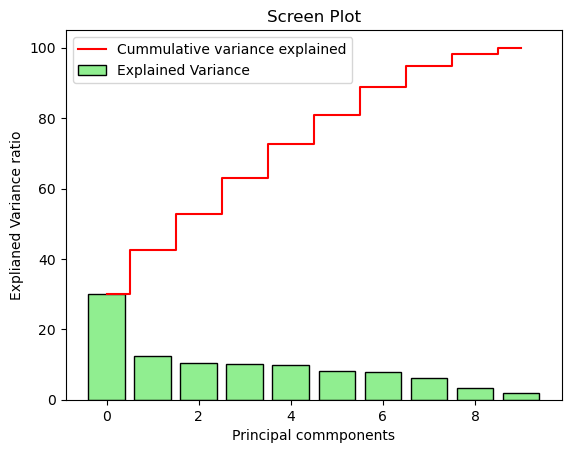

In [35]:
#Screen plot

plt.bar(range(10), var_exp, align='center', color='lightgreen', edgecolor= 'black', label='Explained Variance')
plt.step(range(10), cum_var_exp, where='mid', color='red', label='Cummulative variance explained')
plt.xlabel('Principal commponents')
plt.ylabel('Explianed Variance ratio')
plt.title('Screen Plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [39]:
pca = PCA(n_components = 8)

pca_df = pd.DataFrame(pca.fit_transform(df_standardized), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.826346,0.001440,0.373280,-1.309386,-0.035280,-0.859192,-0.780875,-1.732532
1,-1.408343,1.018007,0.104814,-1.235488,0.470146,-1.226858,0.880965,0.884619
2,1.514312,-0.496086,-0.426022,0.796046,0.601807,-0.273631,0.413537,-0.480689
3,-1.697201,-1.116177,-0.717212,0.726585,0.396509,0.496145,0.132718,0.151128
4,0.232370,0.396964,0.240554,0.488633,-1.516932,1.679975,-0.567923,0.353730


In [42]:
#finding optimal K value by KMeans clustering using Elbow Plotf
cluster_errors = []
cluster_range = range(2, 15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)


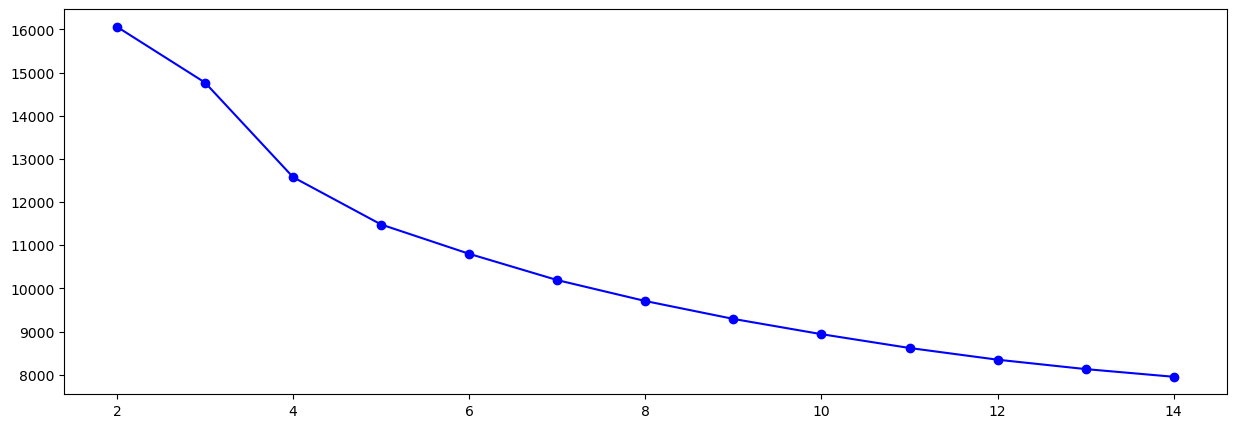

In [43]:
#creating a dataframe of nimber of clusters and clusters_errors

cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

##elbow plot

plt.figure(figsize=[15, 5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color ='b')

plt.show()

From the above elbow plot we can see at the cluster K = 3, the inertia significatly decrease. Hence we can select our optimal clusters as K = 3

In [44]:
kmeans = KMeans(n_clusters = 3, random_state =100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [45]:
#creating a dataframe of the labels 
label = pd.DataFrame(kmeans.labels_, columns =['Label'])

In [46]:
#Joining the label datafrome to the pca_df dataframe

kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.826346,0.001440,0.373280,-1.309386,-0.035280,-0.859192,-0.780875,-1.732532,1
1,-1.408343,1.018007,0.104814,-1.235488,0.470146,-1.226858,0.880965,0.884619,0
2,1.514312,-0.496086,-0.426022,0.796046,0.601807,-0.273631,0.413537,-0.480689,1
3,-1.697201,-1.116177,-0.717212,0.726585,0.396509,0.496145,0.132718,0.151128,2
4,0.232370,0.396964,0.240554,0.488633,-1.516932,1.679975,-0.567923,0.353730,2


In [48]:
kmeans_df['Label'].value_counts()

Label
1    916
2    844
0    480
Name: count, dtype: int64

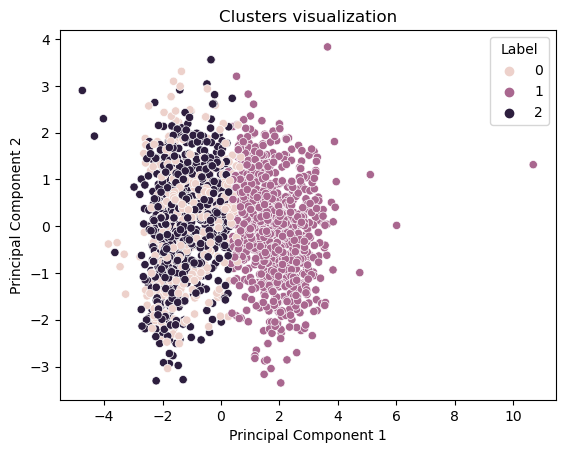

In [51]:
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=kmeans_df)
plt.title('Clusters visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

# Agglomerative clustering using the original data

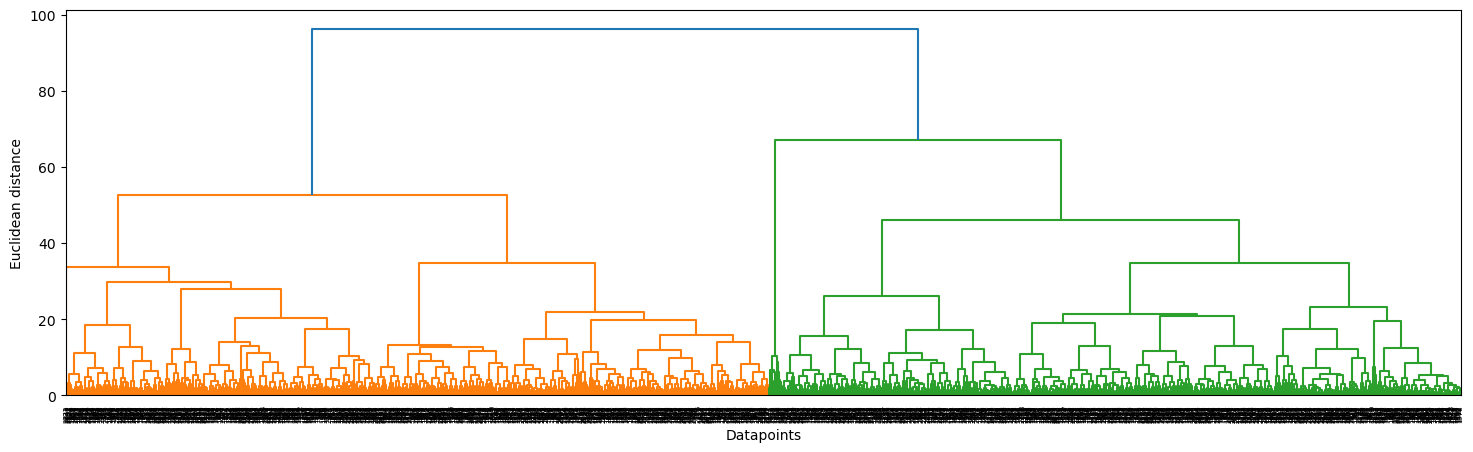

In [56]:
plt.figure(figsize=[18,5])

merg = linkage(df_standardized, method ='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

# computing sihoutte score for agglomerative clustering

In [58]:
from sklearn.metrics import silhouette_score

In [62]:
for i in range(2, 15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df_standardized)
    labels = hier.fit_predict(df_standardized)
    print(i, silhouette_score(df_standardized, labels))

2 0.20718590277866128
3 0.2165807208502883
4 0.1552700279143774
5 0.14257033530592866
6 0.12424457363369379
7 0.12361607731909144
8 0.1255013151625035
9 0.12897385031494682
10 0.13643953679655546
11 0.1329706759718113
12 0.12534933274283344
13 0.11959547721463011
14 0.1186435836090777


we can observe from the above dendrogram and as well as the silhoutte scores for different clusters, The highest silhoutte score is for cluster 3.
Lets choose K=3 as the optimal clsuter size and build a agglomerative clustering model using the original scaled dataset.

In [63]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')

hie_cluster_model = hie_cluster.fit(df_standardized)

In [64]:
# creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


### Visualization and Interpretation of results

## KMeans Clustering Visualization and Interpretation
# Interpretation:
The scatter plot shows how the data points are distributed among different clusters in the reduced 2D PCA space.
Each color represents a different cluster.
The separation between clusters indicates how distinct they are from each other.

## Agglomerative Clustering Visualization and Interpretation

# Interpretation:
The dendrogram shows the hierarchical merging of clusters.
The height at which two clusters are joined represents the distance between them.
Cutting the dendrogram at different heights results in different numbers of clusters.

## Bivariate Analysis and Interpretation

# Interpretation:
Boxplots will help in understanding the distribution of each feature within different clusters.
The central tendency (median) and spread (IQR) for each feature can be observed.
This can help identify which features distinguish the clusters

-----
## Happy Learning
-----